<a href="https://colab.research.google.com/github/offsuijn/do-it-DeepLearning/blob/main/Ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 분류하는 뉴런을 만듭니다

앞 챕터에서 배운 선형 회귀를 확장하여 분류 모델을 만든다.  
그 중에서도 2가지 클래스를 구분하는 이진 분류를 다룰 것인데 이를 위해서는 로지스틱 회귀를 알아야합니다.  
지금부터 로지스틱 회귀에 대해 알아보도록 하겠습니다.

## 04-1 초기 인공지능 알고리즘과 로지스틱 회귀를 알아봅니다

### 1. 퍼셉트론
선형 회귀와 유사하지만 마지막 단계에서 이진 분류를 하기 위해 계단 함수를 사용한다.</br>
**계단 함수의 결과값**(1 / -1)을 이용하여 가중치를 학습한다.</br>
- 선형 함수 : w1*x1 + w2*x2 + b = z </br>
 n개의 특성이 있는 함수 => w1*x1 + w2*x2 ... + wn*xn + b = z</br>
 x의 개수 = 특성의 개수, 각 특성마다 가중치를 두고 업데이트한다.
- 계단 함수 : if (z > 0) ? 1 : -1

### 2. 아달린
퍼셉트론과 다르게 **선형 함수의 결과**를 학습에 사용한다.</br>
계단 함수의 결과는 예측에만 활용한다.
### 3. 로지스틱 회귀
선형 함수의 값을 임계 함수에 보내기 전에 활성화 함수를 거친다.</br>
**활성화 함수의 결과**를 학습에 사용한다.</br>
임계 함수는 퍼셉트론이나 아달린의 계단 함수와 역할이 비슷하지만 활성화 함수의 출력값을 사용한다는 점에서 차이가 있다.

## [ 활성화 함수는 비선형 함수를 사용합니다. ]
- 활성화 함수 : 로지스틱 회귀가 선형 함수의 결과를 확률로 바꾸기 위해 사용하는 시그모이드 함수와 같은 함수</br>
만약 활성화 함수가 선형 함수라면 둘을 쌓은 수식은 다시 하나의 큰 선형 함수가 되기 때문입니다.</br>
따라서 비선형 문제를 해결하기 위해 활성화 함수는 의무적으로 비선형 함수를 사용하는데요, 로지스틱 회귀에서는 '시그모이드 함수'를 사용합니다.

## 04-2 시그모이드 함수를 알아봅니다



### 시그모이드 함수의 역할

로지스틱 회귀의 전체 구조 : 선형 함수 - 활성화 함수 [sigmoid function] - 임계 함수</br>
시그모이드 함수는 선형함수의 값인 z를 0~1 사이의 확률값으로 변환시켜주는 역할을 한다.</br>
즉, 시그모이드 함수를 통과하면 성공 확률을 알 수 있다.

### 시그모이드 함수가 만들어지는 과정

Odds Ratio => logit function => sigmoid function

- Odds Ratio</br>
 -> 성공 확률과 실패 확률의 비율</br>
 p가 1에 가까워지면서 급격히 값이 증가한다.

- logit function</br>
 -> Odds Ratio에 log를 씌운 것</br>
 p가 0에서 1로 변함에 따라서 매우 큰 음수에서 매우 큰 양수로 변한다.

- sigmoid function</br>
 -> logit function의 역함수이다.
 가로 축을 z로 놓아 선형 함수의 결과가 입력으로 들어갈 수 있도록 한다.
 이 함수의 결과는 p로 성공 확률을 나타낸다.
 시그모이드 함수를 로지스틱 함수라고도 부른다.


## 04-3 로지스틱 손실 함수를 경사하강법에 적용합니다 

## 경사하강법 (Gradient Descent)
 -> 학습률과 손실함수의 순간기울기(gradient)를 이용하여, Gradient가 낮아지는 방향으로 가중치(weight)를 업데이트하는 방법  
 따라서 gradient가 있다면 [미분가능하다면] 경사하강법을 사용할 수 있다.  
 
 
 선형 회귀 : 정답과 예상값이 오차 제곱이 최소가 되는 가중치와 절편 찾기 -> SE(오차제곱) 함수 사용  
 분류 (로지스틱 회귀) : 올바르게 분류된 샘플의 데이터 비율 자체를 높이기 -> 로지스틱 손실 함수  


## 로지스틱 손실 함수
 -> 다중 분류를 위한 손실 함수인 크로스 엔트로피 손실 함수를 이진 분류 버전으로 만든 것  
Backpropagation에서 로지스틱 손실 함수를 다루는데, 로지스틱 회귀에서는 activate function[sigmoid]의 결과를 손실 함수의 입력[a]으로 사용한다.  
로지스틱 손실 함수를 최소화하면 a를 최적의 값으로 만들 수 있다.

  - 이 함수를 가중치와 절편에 대하여 미분하면 SE(제곱 오차)를 미분한 것과 동일한 결과를 얻을 수 있다.  
   - 가중치에 대한 로지스틱 손실 함수의 미분 : -(y-a)x
   - 절편에 대한 로지스틱 손실 함수의 미분 : -(y-a)1
   - 로지스틱 손실 함수의 미분 과정은 선형 함수, 시그모이드를 거슬러 올라가며 도함수의 곱으로 표현된다.  
  - 이렇게 로지스틱 손실 함수에 대한 미분이 연쇄 법칙에 의해 진행되는 구조를 보고 'gradient가 역전파된다'라고 말한다. => Backpropagation  

- 가중치 업데이트 방법
 -> 로지스틱 손실함수를 가중치에 대해 미분한 식을 가중치에서 뺀다. : 손실을 최소화하기 위하여

 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

### Odds ratio

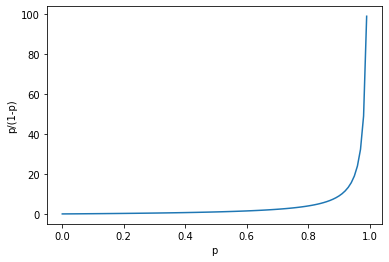

In [4]:
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

### Logit function

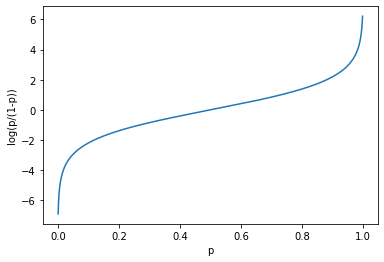

In [5]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

### Sigmoid function [Logistic function]

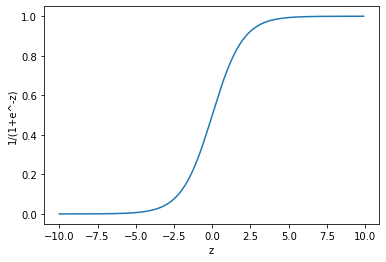

In [6]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

## 04-4 분류용 데이터셋을 준비합니다

'음성 샘플(정상 종양)'과 '양성 샘플(악성 종양)'을 구분하는 이진 분류 문제 풀기

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [9]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

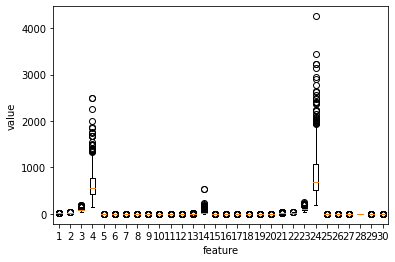

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(cancer.data) # feature가 너무 많아 산점도로 표현하기 어려우므로 boxplot을 사용한다.
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [11]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [12]:
np.unique(cancer.target, return_counts=True) # 1은 True, 0은 False

(array([0, 1]), array([212, 357]))

In [13]:
x = cancer.data
y = cancer.target

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [16]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [21]:
class LogisticNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err # 가중치 gradient
    b_grad = 1 * err # 절편 gradient
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None) # exp 계산을 위한 전처리
    a = 1 / (1 + np.exp(-z)) # sigmoid 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs): # epochs만큼 반복
      for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
        z = self.forpass(x_i) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y_i - a) # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5 # 계단 함수 적용




In [22]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [23]:
np.mean(neuron.predict(x_test) == y_test)

0.8070175438596491

## 04-6 단일층 신경망을 만들어 봅니다

### 단일층 신경망
일반적인 신경망은 입력층과 가운데 여러 은닉층, 그리고 출력층으로 구성되어있다.  
로지스틱 회귀는 은닉층이 없는 신경망이다. 이처럼 입력층과 출력층만 가지는 신경망을 단일층 신경망이라고 부른다.  


위에서 구현한 Logistic Neuron은 성능이 82%로 아주 좋지는 않다.  
정확도를 더 높이기위해 SingleLayer를 만들어서 ** 매 epoch마다 훈련 세트의 샘플 순서를 섞어서 사용**할 것이다.  
이러한 과정 속에서 가중치 최적값의 탐색 과정이 다양해서 가중치 최적값을 제대로 찾을 수 있기 때문이다.



In [30]:
class SingleLayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = [] # epoch마다 각 샘플의 loss의 평균값을 저장

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err # 가중치 gradient
    b_grad = 1 * err # 절편 gradient
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None) # exp 계산을 위한 전처리
    a = 1 / (1 + np.exp(-z)) # sigmoid 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0 # loss 초기화
      indexes = np.random.permutation(np.arange(len(x))) # index 섞기
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10) # log 계산을 위한 전처리

        loss += -(y[i]*np.log(a) + (1-y[i]*np.log(1-a))) # epoch마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 계단 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


In [32]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

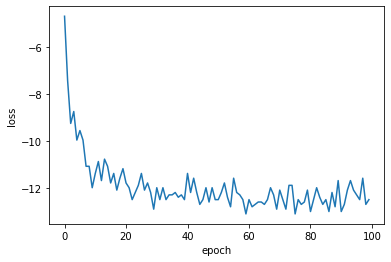

In [34]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7 사이킷런의 경사 하강법을 사용해 봅니다

지금까지 선형 회귀, 로지스틱 회귀 등의 신경망 알고리즘을 직접 구현했지만 사이킷런에는 미리 이러한 알고리즘이 구현되어있다.  
사이킷런에 있는 SGDClassifier을 사용해 로지스틱 회귀를 수행해보겠다.

In [35]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3)

In [36]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9385964912280702

In [42]:
a = sgd.predict()
print(a, y_test[:10])

[0 1 1 0 0 1 1 0 0 0] [0 1 0 1 0 1 1 0 0 0]
